In [8]:
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import requests

In [9]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source, 'lxml')

In [10]:
all_tables=soup.find_all("table")
A = []
B = []
C = []
for items in soup.find('table', class_='wikitable').find_all('tr')[1::1]:
    data = items.find_all(['th','td'])
    try:
        Postal_code = data[0].get_text().replace("\n","")
        Borough = data[1].get_text().replace("\n","")
        Neighborhood = data[2].get_text().replace("\n","")
        A.append(Postal_code)
        B.append(Borough)
        C.append(Neighborhood)
    except IndexError:pass


df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighborhood']=C
df = df[df['Borough'] != "Not assigned"]
df = df[df['Neighborhood']!="Not assigned"]
df.reset_index(drop=True, inplace = True)
df['Neighborhood'] = df['Neighborhood'].str.replace('/',',')
df_new=df[df['Borough'].str.contains("Toronto")]

In [11]:
url2="http://cocl.us/Geospatial_data"
geo_data=pd.read_csv(url2)
geo_data.rename(columns={"Postal Code":"PostalCode"}, inplace=True)
geo_data.head(10)
toronto_data= pd.merge(df_new, geo_data, on='PostalCode', how='inner')
toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin , Dovercourt Village",43.669005,-79.442259


In [12]:
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [13]:
CLIENT_ID = '4KRVNZUYCYJ5B4QAMUU4T43S0QMCD1HHJKNSLNIC1DUV22CR' # your Foursquare ID
CLIENT_SECRET = 'B3IOL04MVVMFSU2GEK1FNF1314GVF1URYAHM0RJ3THGCYAXG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):     
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.654260,-79.360636,Roselle Desserts,54ea41ad498e9a11e9e13308,43.653447,-79.362017,Bakery
1,"Regent Park , Harbourfront",43.654260,-79.360636,Tandem Coffee,53b8466a498e83df908c3f21,43.653559,-79.361809,Coffee Shop
2,"Regent Park , Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,574c229e498ebb5c6b257902,43.653249,-79.358008,Distribution Center
3,"Regent Park , Harbourfront",43.654260,-79.360636,Body Blitz Spa East,50760559e4b0e8c7babe2497,43.654735,-79.359874,Spa
4,"Regent Park , Harbourfront",43.654260,-79.360636,Morning Glory Cafe,4ae5b91ff964a520a6a121e3,43.653947,-79.361149,Breakfast Spot
5,"Regent Park , Harbourfront",43.654260,-79.360636,Impact Kitchen,5612b1cc498e3dd742af0dc8,43.656369,-79.356980,Restaurant
6,"Regent Park , Harbourfront",43.654260,-79.360636,Corktown Common,51ccc048498ec7792efc955e,43.655618,-79.356211,Park
7,"Regent Park , Harbourfront",43.654260,-79.360636,Figs Breakfast & Lunch,4af59046f964a520e0f921e3,43.655675,-79.364503,Breakfast Spot
8,"Regent Park , Harbourfront",43.654260,-79.360636,The Distillery Historic District,4ad4c05ef964a520bff620e3,43.650244,-79.359323,Historic Site
9,"Regent Park , Harbourfront",43.654260,-79.360636,Dominion Pub and Kitchen,566e1294498e3f6629006bc3,43.656919,-79.358967,Pub


In [16]:
toronto_venues.groupby('Venue Category').count()
toronto_bar = toronto_venues[toronto_venues['Venue Category'] == "Bar"]
toronto_bar

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
77,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,SUDS,4cc5e76091413704e955cc55,43.659880,-79.394712,Bar
132,"Garden District, Ryerson",43.657162,-79.378937,Duke's Refresher + Bar,529fa9e111d2159d1f3caa0e,43.658980,-79.382949,Bar
340,Central Bay Street,43.657952,-79.387383,Duke's Refresher + Bar,529fa9e111d2159d1f3caa0e,43.658980,-79.382949,Bar
426,"Richmond , Adelaide , King",43.650571,-79.384568,Boxcar Social Temperance,5894c1f9266c1121f0a757d1,43.650557,-79.381956,Bar
446,"Richmond , Adelaide , King",43.650571,-79.384568,Earls Kitchen & Bar,4d2b615e342d6dcb2b8115cb,43.647946,-79.383706,Bar
504,"Dufferin , Dovercourt Village",43.669005,-79.442259,The Greater Good Bar,5753753b498eeb535c53aed5,43.669409,-79.439267,Bar
554,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752,Corks Beer & Wine Bar,4d0faed7d467236a7291bf4a,43.642493,-79.381540,Bar
566,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752,The Rec Room,5952cf02829b0c59fa430f63,43.641110,-79.386763,Bar
632,"Little Portugal , Trinity",43.647927,-79.419750,Reposado,4ae662e8f964a520cfa621e3,43.647321,-79.420032,Bar
633,"Little Portugal , Trinity",43.647927,-79.419750,The Communist's Daughter,4adfd8c0f964a520bf7d21e3,43.649362,-79.420963,Bar


In [17]:
toronto_bar.shape

(30, 8)

In [18]:
def getVenuesDetail(id):
    venues_list=[]
    for venue_id in id:     
        # create the API request URL
        url_n = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
            
        # make the GET request
        results = requests.get(url_n).json()
        name = results['response']['venue']['name']
        ID = results['response']['venue']['id']
        try:
            rating = results['response']['venue']['rating']
        except:
            rating = 0.0
            
        try:
            price = results['response']['venue']['price']['tier']
        except:
            price = 0
            
        try:
            like = results['response']['venue']['likes']['count']
        except:
            like = 0
        
        try:
            photo = results['response']['venue']['photos']['count']
        except:
            photo = 0
            
        try:
            tip = results['response']['venue']['tips']['count']
        except:
            tip = 0
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            ID,
            rating, 
            price,
            like,
            photo,
            tip)])

    venues_detail = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues_detail.columns = ['Venue', 
                  'ID', 
                  'Rating', 
                  'Price', 
                  'Likes',
                  'Photos', 
                  'Tips']
    
    return(venues_detail)

In [103]:
toronto_bar_detail = getVenuesDetail(id=toronto_bar['Venue ID'])
toronto_bar_detail.rename(columns={'Venue' : 'Neighborhood'}, inplace = True)
toronto_bar_detail = toronto_bar_detail.assign(**{c: toronto_bar[c].to_numpy() for c in ('Venue Latitude', 'Venue Longitude')})
toronto_bar_detail.rename(columns={'Venue Latitude' : 'Latitude', 'Venue Longitude' : 'Longitude'}, inplace = True)
toronto_bar_detail

,Neighborhood,ID,Rating,Price,Likes,Photos,Tips,Latitude,Longitude
0,SUDS,4cc5e76091413704e955cc55,6.0,2,5,1,3,43.659880,-79.394712
1,Duke's Refresher + Bar,529fa9e111d2159d1f3caa0e,8.1,2,92,217,36,43.658980,-79.382949
2,Duke's Refresher + Bar,529fa9e111d2159d1f3caa0e,8.1,2,92,217,36,43.658980,-79.382949
3,Boxcar Social Temperance,5894c1f9266c1121f0a757d1,8.0,2,35,36,7,43.650557,-79.381956
4,Earls Kitchen & Bar,4d2b615e342d6dcb2b8115cb,7.9,3,262,365,116,43.647946,-79.383706
5,The Greater Good Bar,5753753b498eeb535c53aed5,9.3,2,47,49,6,43.669409,-79.439267
6,Corks Beer & Wine Bar,4d0faed7d467236a7291bf4a,7.5,2,10,19,5,43.642493,-79.381540
7,The Rec Room,5952cf02829b0c59fa430f63,8.1,2,115,103,13,43.641110,-79.386763
8,Reposado,4ae662e8f964a520cfa621e3,8.5,2,86,162,45,43.647321,-79.420032
9,The Communist's Daughter,4adfd8c0f964a520bf7d21e3,8.4,1,68,40,23,43.649362,-79.420963


In [25]:
toronto_bar_detail.corr()

,Rating,Price,Likes,Photos,Tips
Rating,1.000000,-0.118195,0.284868,0.171478,0.106293
Price,-0.118195,1.000000,0.454389,0.452030,0.522452
Likes,0.284868,0.454389,1.000000,0.934885,0.940157
Photos,0.171478,0.452030,0.934885,1.000000,0.932678
Tips,0.106293,0.522452,0.940157,0.932678,1.000000


In [26]:
toronto_bar_venues = getNearbyVenues(names=toronto_bar['Venue'],
                                   latitudes=toronto_bar['Venue Latitude'],
                                   longitudes=toronto_bar['Venue Longitude']
                                  )
toronto_bar_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,SUDS,43.659880,-79.394712,Prenup Pub,54238a83498e5efd4a50435b,43.658882,-79.394828,Gastropub
1,SUDS,43.659880,-79.394712,Starbucks,576d30ed498ef2e95e26e6d0,43.659456,-79.390411,Coffee Shop
2,SUDS,43.659880,-79.394712,Kekou Gelato House,51e87a62498e8eea21f772d3,43.656099,-79.392715,Ice Cream Shop
3,SUDS,43.659880,-79.394712,McCafé,5b57b67fc53093003750b093,43.657943,-79.398993,Café
4,SUDS,43.659880,-79.394712,Vegetarian Haven,4aeb711ef964a52017c221e3,43.656016,-79.392758,Vegetarian / Vegan Restaurant
5,SUDS,43.659880,-79.394712,Queen's Park,4b9d206bf964a520e69136e3,43.663946,-79.392180,Park
6,SUDS,43.659880,-79.394712,Jimmy's Coffee,57fe5f64498e08c9fc55cb87,43.655827,-79.392042,Café
7,SUDS,43.659880,-79.394712,Hart House Theatre,4ce47a4bc850721e2b8bc38a,43.663571,-79.394616,Theater
8,SUDS,43.659880,-79.394712,Fat Bastard Burrito,55e1f58b498ed51280251aa4,43.658900,-79.394530,Burrito Place
9,SUDS,43.659880,-79.394712,The Clubhouse,51b8ebe8e4b051460c6dfa24,43.658246,-79.399894,Sandwich Place


In [27]:
toronto_bar_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
A Dark Horse,53,53,53,53,53,53,53
Bar Fancy,93,93,93,93,93,93,93
Boxcar Social Temperance,400,400,400,400,400,400,400
Charlie's Gallery,91,91,91,91,91,91,91
Cold Tea,79,79,79,79,79,79,79
Corks Beer & Wine Bar,97,97,97,97,97,97,97
Dakota Tavern,36,36,36,36,36,36,36
Duke's Refresher + Bar,200,200,200,200,200,200,200
Earls Kitchen & Bar,300,300,300,300,300,300,300


In [28]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_bar_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_bar_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,...,Tour Provider,Track,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,A Dark Horse,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Bar Fancy,0.010753,0.000000,0.000000,0.000000,0.000000,0.010753,0.010753,0.010753,0.000,...,0.000000,0.000000,0.000000,0.021505,0.000000,0.000000,0.010753,0.000000,0.000000,0.00
2,Boxcar Social Temperance,0.000000,0.000000,0.030000,0.000000,0.000000,0.010000,0.000000,0.030000,0.000,...,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01
3,Charlie's Gallery,0.021978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.010989,0.010989,0.000000,0.000000,0.000000,0.010989,0.00
4,Cold Tea,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000,0.000,...,0.000000,0.000000,0.000000,0.063291,0.000000,0.000000,0.037975,0.012658,0.000000,0.00
5,Corks Beer & Wine Bar,0.000000,0.000000,0.000000,0.000000,0.010309,0.010309,0.000000,0.000000,0.000,...,0.000000,0.000000,0.010309,0.010309,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Dakota Tavern,0.027778,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.055556,0.000,...,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.027778,0.027778,0.000000,0.00
7,Duke's Refresher + Bar,0.010000,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.00
8,Earls Kitchen & Bar,0.000000,0.000000,0.040000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000,...,0.000000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00
9,Harbord House,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A Dark Horse,Café,Coffee Shop,Gastropub,Italian Restaurant,Restaurant,Pub,Pizza Place,Sushi Restaurant,Diner,Falafel Restaurant
1,Bar Fancy,Restaurant,Bar,Café,Furniture / Home Store,Coffee Shop,Sandwich Place,Burrito Place,Korean Restaurant,Beer Bar,Juice Bar
2,Boxcar Social Temperance,Coffee Shop,Café,Restaurant,Gym,Hotel,American Restaurant,Asian Restaurant,Gastropub,Breakfast Spot,Lingerie Store
3,Charlie's Gallery,Café,Coffee Shop,Pizza Place,Sandwich Place,Bookstore,Bar,Bakery,Restaurant,Sushi Restaurant,Pub
4,Cold Tea,Café,Vegetarian / Vegan Restaurant,Bar,Coffee Shop,Vietnamese Restaurant,Pizza Place,Mexican Restaurant,Dumpling Restaurant,Chinese Restaurant,Gaming Cafe


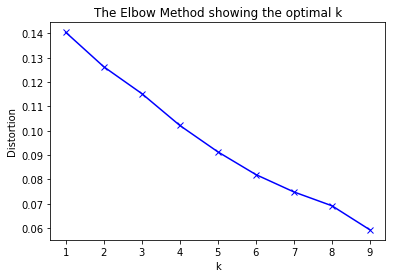

In [32]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(toronto_grouped_clustering)
    kmeanModel.fit(toronto_grouped_clustering)
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / toronto_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood



#toronto_merged # check the last columns!
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,A Dark Horse,Café,Coffee Shop,Gastropub,Italian Restaurant,Restaurant,Pub,Pizza Place,Sushi Restaurant,Diner,Falafel Restaurant
1,1,Bar Fancy,Restaurant,Bar,Café,Furniture / Home Store,Coffee Shop,Sandwich Place,Burrito Place,Korean Restaurant,Beer Bar,Juice Bar
2,2,Boxcar Social Temperance,Coffee Shop,Café,Restaurant,Gym,Hotel,American Restaurant,Asian Restaurant,Gastropub,Breakfast Spot,Lingerie Store
3,0,Charlie's Gallery,Café,Coffee Shop,Pizza Place,Sandwich Place,Bookstore,Bar,Bakery,Restaurant,Sushi Restaurant,Pub
4,0,Cold Tea,Café,Vegetarian / Vegan Restaurant,Bar,Coffee Shop,Vietnamese Restaurant,Pizza Place,Mexican Restaurant,Dumpling Restaurant,Chinese Restaurant,Gaming Cafe
5,2,Corks Beer & Wine Bar,Coffee Shop,Hotel,Café,Sandwich Place,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Park,Brewery,Plaza
6,1,Dakota Tavern,Bar,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Men's Store,Cocktail Bar,Asian Restaurant,Record Shop,Bistro,Brewery
7,2,Duke's Refresher + Bar,Coffee Shop,Middle Eastern Restaurant,Italian Restaurant,Bubble Tea Shop,Burger Joint,Café,Japanese Restaurant,Tea Room,Spa,Clothing Store
8,2,Earls Kitchen & Bar,Coffee Shop,Café,Hotel,American Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Gastropub,Gym
9,0,Harbord House,Restaurant,Café,Bakery,Bookstore,Sandwich Place,Beer Bar,Pizza Place,Italian Restaurant,Music Venue,Pub


In [54]:
toronto_merged = toronto_bar_detail
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
column_new = ['Neighborhood', 'ID', 'Rating', 'Price', 'Likes', 'Photos', 'Tips', 'Latitude', 'Longitude', 'Cluster Labels']
toronto_merged = toronto_merged[column_new]
toronto_merged

,Neighborhood,ID,Rating,Price,Likes,Photos,Tips,Latitude,Longitude,Cluster Labels
0,SUDS,4cc5e76091413704e955cc55,6.0,2,5,1,3,43.659880,-79.394712,2
1,Duke's Refresher + Bar,529fa9e111d2159d1f3caa0e,8.1,2,92,217,36,43.658980,-79.382949,2
2,Duke's Refresher + Bar,529fa9e111d2159d1f3caa0e,8.1,2,92,217,36,43.658980,-79.382949,2
3,Boxcar Social Temperance,5894c1f9266c1121f0a757d1,8.0,2,35,36,7,43.650557,-79.381956,2
4,Earls Kitchen & Bar,4d2b615e342d6dcb2b8115cb,7.9,3,262,365,116,43.647946,-79.383706,2
5,The Greater Good Bar,5753753b498eeb535c53aed5,9.3,2,47,49,6,43.669409,-79.439267,1
6,Corks Beer & Wine Bar,4d0faed7d467236a7291bf4a,7.5,2,10,19,5,43.642493,-79.381540,2
7,The Rec Room,5952cf02829b0c59fa430f63,8.1,2,115,103,13,43.641110,-79.386763,2
8,Reposado,4ae662e8f964a520cfa621e3,8.5,2,86,162,45,43.647321,-79.420032,1
9,The Communist's Daughter,4adfd8c0f964a520bf7d21e3,8.4,1,68,40,23,43.649362,-79.420963,1


In [60]:
from folium.plugins import FastMarkerCluster

address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [64]:
toronto_merged.groupby('Cluster Labels').mean()['Rating']

Cluster Labels
0    7.255556
1    8.312500
2    7.792308
Name: Rating, dtype: float64

In [66]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(toronto_merged['Rating'], toronto_merged['Cluster Labels'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     1.0569  -0.0328 2.1467 False 
  0      2     0.5368  -0.4358 1.5093 False 
  1      2    -0.5202   -1.528 0.4876 False 
--------------------------------------------


In [88]:
df_a = toronto_merged[toronto_merged['Cluster Labels'] == 1]
nb_a = df_a['Neighborhood']
s = len(nb_a)
venue_a = toronto_bar_venues.loc[toronto_bar_venues['Neighborhood'].isin(nb_a)]
venue_a = venue_a.groupby('Venue Category').count()[['Neighborhood']]
venue_a.columns = ['Cluster 1']
venue_a.div(s).sort_values(by='Cluster 1', ascending=False)

,Cluster 1
Venue Category,
Bar,3.875
Restaurant,2.500
Café,2.125
Coffee Shop,2.000
Vegetarian / Vegan Restaurant,1.250
Asian Restaurant,1.125
Ice Cream Shop,1.125
Brewery,1.125
Italian Restaurant,1.125
